# # ***Аналіз Даних (EDA)***

In [1]:
import pandas as pd

#Завантаження даних
file_path = '/kaggle/input/internet-service-churn/internet_service_churn.csv'
data = pd.read_csv(file_path)

#Первинний огляд даних
print(data.head(5))
print(data.shape)

   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  remaining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0                    0

###    ***Аналіз пропущених значень:***

In [2]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100 #формула для утворення процента
missing_report = pd.DataFrame({'Відсутні значення': missing_values, '% Пропусків': missing_percentage})
print("Пропущені значення:")
print(missing_report)

Пропущені значення:
                             Відсутні значення  % Пропусків
id                                           0     0.000000
is_tv_subscriber                             0     0.000000
is_movie_package_subscriber                  0     0.000000
subscription_age                             0     0.000000
bill_avg                                     0     0.000000
remaining_contract                       21572    29.847525
service_failure_count                        0     0.000000
download_avg                               381     0.527161
upload_avg                                 381     0.527161
download_over_limit                          0     0.000000
churn                                        0     0.000000


###  ***Вивчити розподіли даних (гістограми, коробкові графіки).***

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

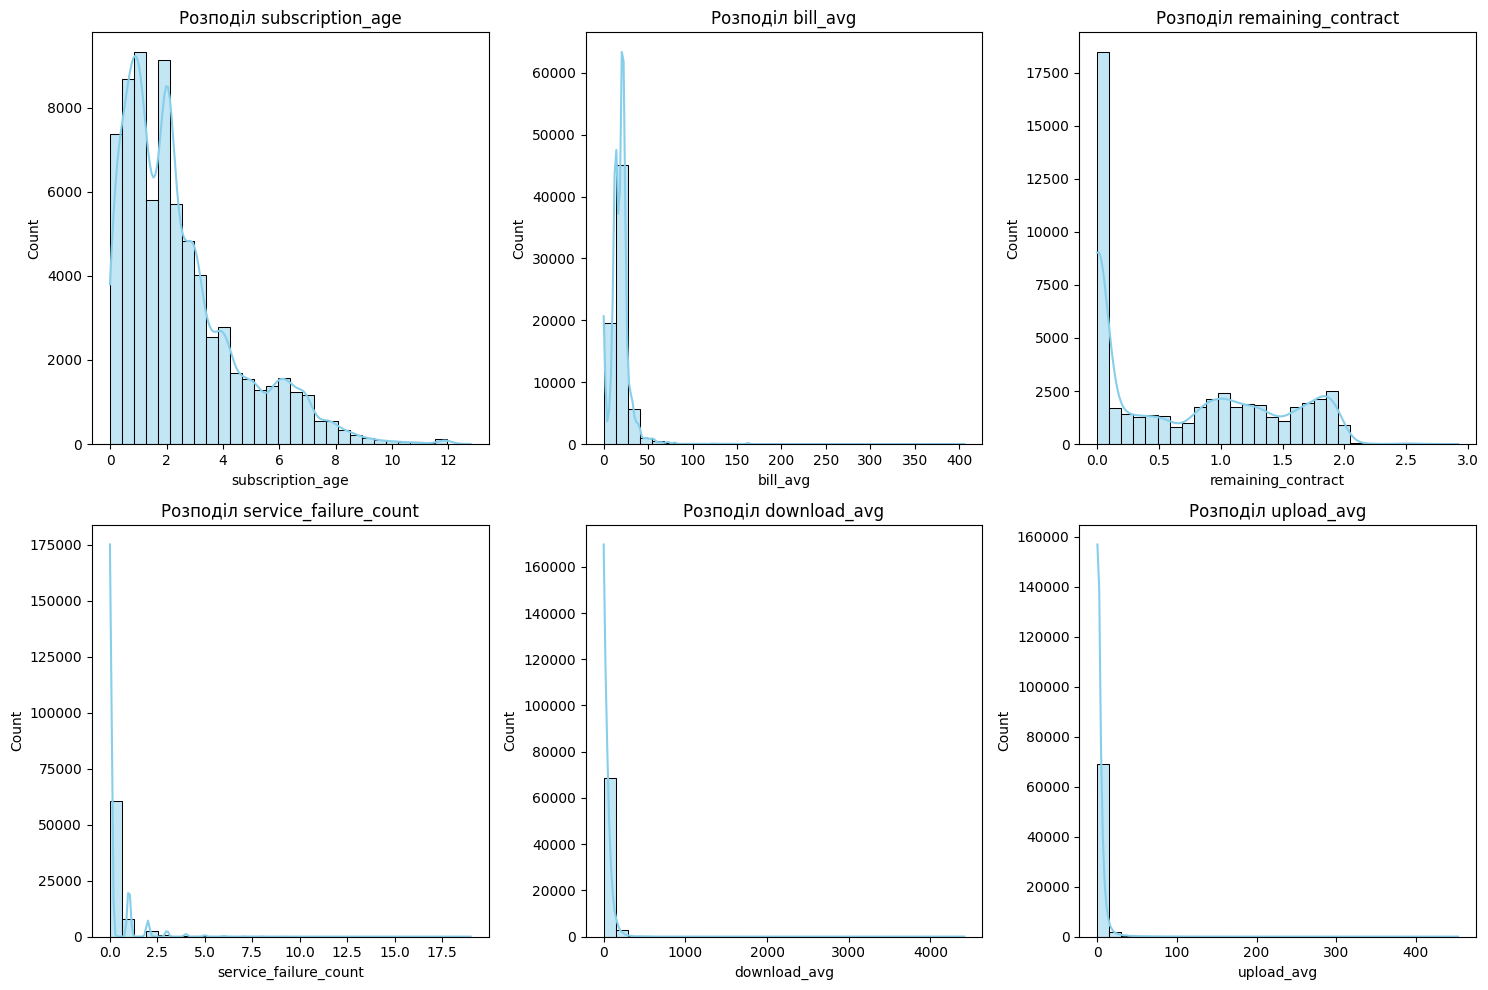

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Список числових змінних
numeric_columns = ['subscription_age', 'bill_avg', 'remaining_contract',
                   'service_failure_count', 'download_avg', 'upload_avg']

# Замінюємо inf та -inf на NaN для уникнення попереджень
data[numeric_columns] = data[numeric_columns].replace([float('inf'), -float('inf')], pd.NA)

# Гістограми
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column].dropna(), kde=True, bins=30, color='skyblue')  # Видаляємо NaN перед побудовою
    plt.title(f'Розподіл {column}')
plt.tight_layout()
plt.show()

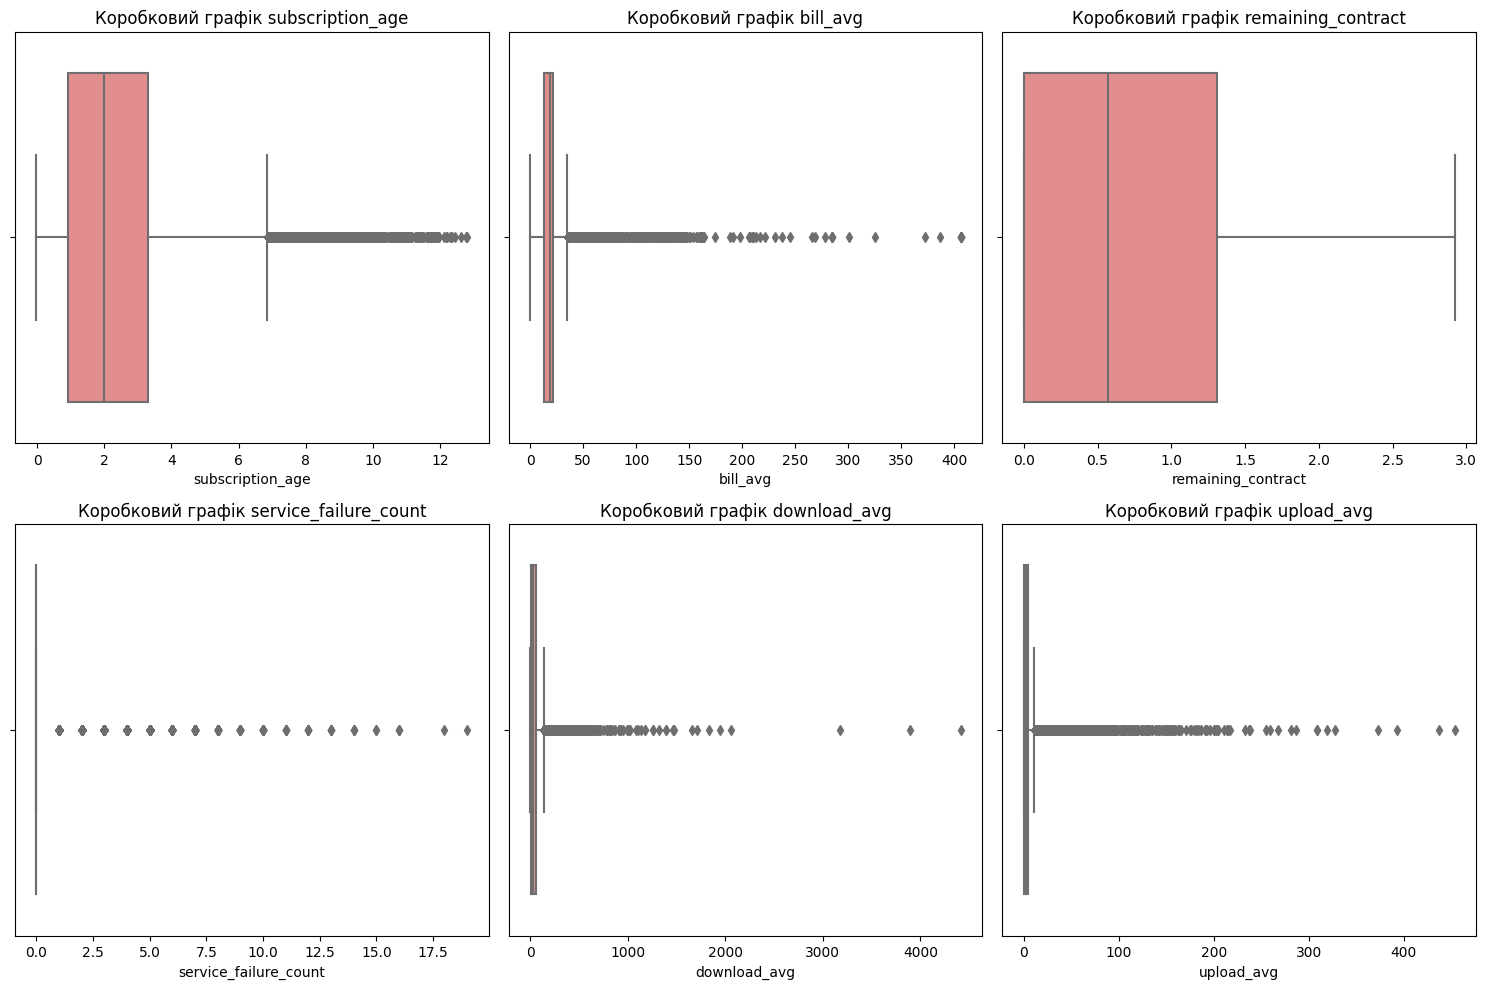

In [14]:
#Коробкові графіки
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f'Коробковий графік {column}')
plt.tight_layout()
plt.show()

***Більшість змінних мають значну кількість викидів, особливо змінні, пов'язані з рахунками (bill_avg), завантаженням (download_avg, upload_avg) і кількістю збоїв (service_failure_count).
Найбільш концентрований і рівномірний розподіл спостерігається для remaining_contract.
Викиди в змінних, таких як download_avg і upload_avg, можуть бути природними для клієнтів із високим споживанням послуг, але вони можуть впливати на моделі, чутливі до викидів.***

###  ***Візуалізація впливу викидів на цільову зміну churn:***

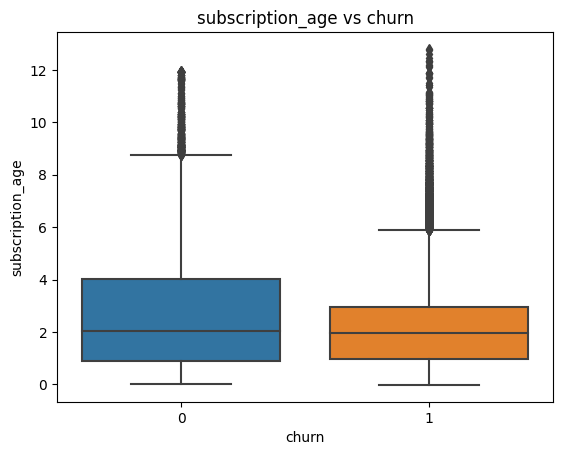

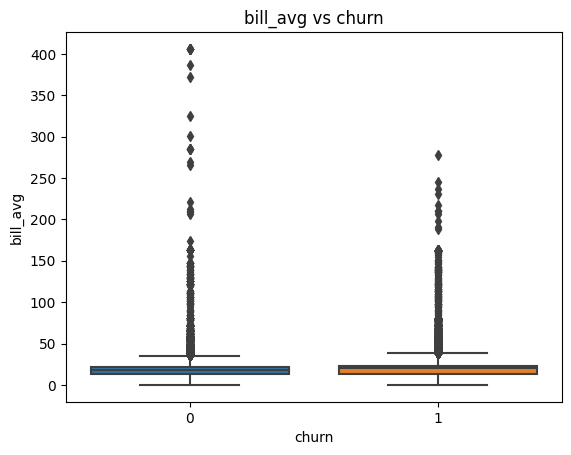

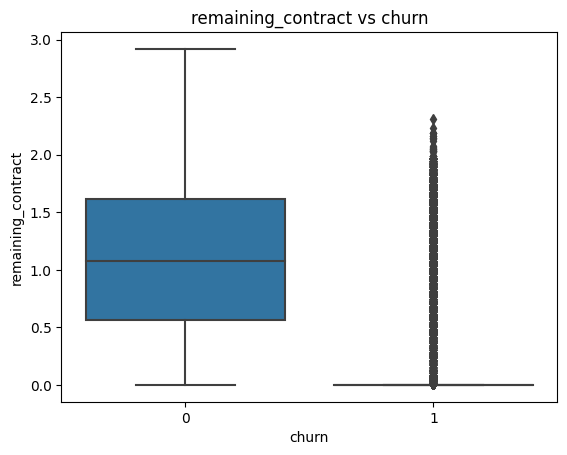

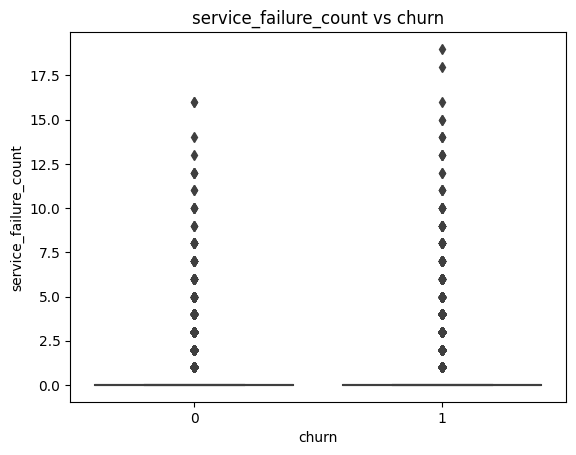

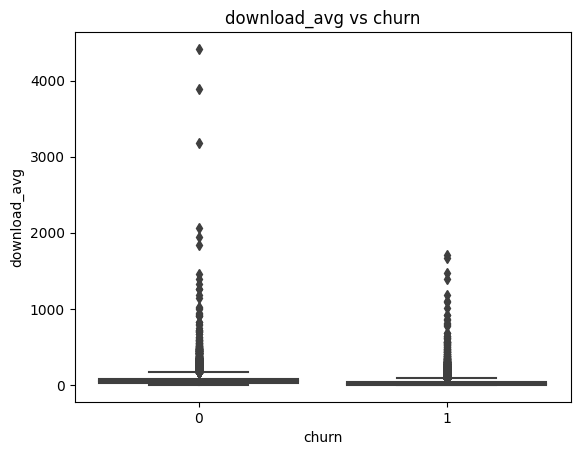

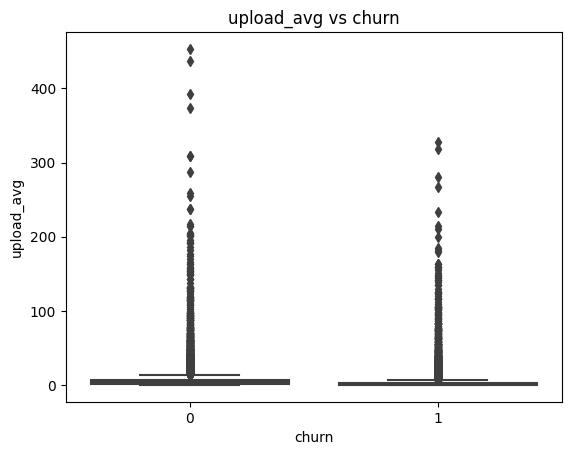

In [16]:
for column in ['subscription_age', 'bill_avg', 'remaining_contract', 'service_failure_count', 'download_avg', 'upload_avg']:
    if column in data.columns:  # Перевіряємо, чи колонка є в датасеті
        sns.boxplot(x='churn', y=column, data=data)
        plt.title(f"{column} vs churn")
        plt.show()
    else:
        print(f"Колонка {column} відсутня в датасеті!")


***На основі графіків:***

- **subscription_age:** Розподіл сильно скошений вправо (є викиди), а також розподіли за churn (0 і 1) відрізняються.
  
- **bill_avg:** Значення також сильно скошені вправо, з багатьма екстремальними значеннями.
  
- **remaining_contract:** Графік показує значні відмінності між групами churn. У клієнтів, які залишили компанію (churn=1), значення значно зосереджені ближче до нуля, тоді як у клієнтів, які залишаються (churn=0), спостерігається ширший розподіл. Медіана для кожної групи (churn=0 і churn=1) є доцільним вибором, оскільки дозволяє врахувати ці розбіжності. Для churn=0 медіана, ймовірно, буде близько 1-1.5, а для churn=1 — близько 0.5.

- **service_failure_count:** Сильне зосередження значень на нулі та рідкісні викиди. 

- **download_avg і upload_avg:** Сильне скошення вправо та велика кількість викидів. Медіана добре підходить для заповнення пропусків.

***Рекомендовані кроки:***

1. **Заповнення пропусків:**
    - Розділити дані на групи за **churn**.
    - Обчислити медіану окремо для кожної групи.
    - Заповнити пропуски відповідною медіаною.


2. **Масштабування:**
    - Використати **RobustScaler** для збереження стійкого масштабування навіть за наявності викидів.

In [17]:
# Перевірка кореляції цих змінних із churn:
correlation_with_churn = data.corr()['churn'].sort_values(ascending=False)
print(correlation_with_churn)


churn                          1.000000
download_over_limit            0.158318
service_failure_count          0.021575
bill_avg                      -0.021058
subscription_age              -0.122441
upload_avg                    -0.162690
download_avg                  -0.298063
is_movie_package_subscriber   -0.307167
is_tv_subscriber              -0.327582
id                            -0.451142
remaining_contract            -0.625450
Name: churn, dtype: float64


****Аналіз кореляції:****

**Сильний зв'язок із цільовою змінною churn:**
    remaining_contract (-0.625450): Сильна негативна кореляція. Це вказує на те, що клієнти з меншою тривалістю контракту мають вищу ймовірність відтоку.

**Помірний зв'язок із churn:**
    is_tv_subscriber (-0.327582): Клієнти, які підписані на TV, мають нижчу ймовірність відтоку.
    is_movie_package_subscriber (-0.307167): Клієнти з підпискою на кіно-пакети також мають нижчу ймовірність відтоку.
    download_avg (-0.298063): Негативна кореляція, що може вказувати на те, що клієнти з більшим завантаженням даних менш схильні до відтоку.

**Слабкий зв'язок із churn:**
    service_failure_count (0.215575): Кількість збоїв у сервісі має слабкий позитивний зв'язок із ймовірністю відтоку.
    download_over_limit (0.153818): Клієнти, які перевищують ліміт завантаження, мають деякий ризик відтоку.
    Інші змінні (bill_avg, subscription_age, upload_avg) мають дуже слабкий зв'язок із churn (близький до 0), що вказує на їх низький вплив.
